--- ÁRBOL SIN PODAR ---
Precisión Entrenamiento: 1.0000
Precisión Test: 0.9415

--- ÁRBOL PODADO (max_depth=3) ---
Precisión Entrenamiento: 0.9698
Precisión Test: 0.9649


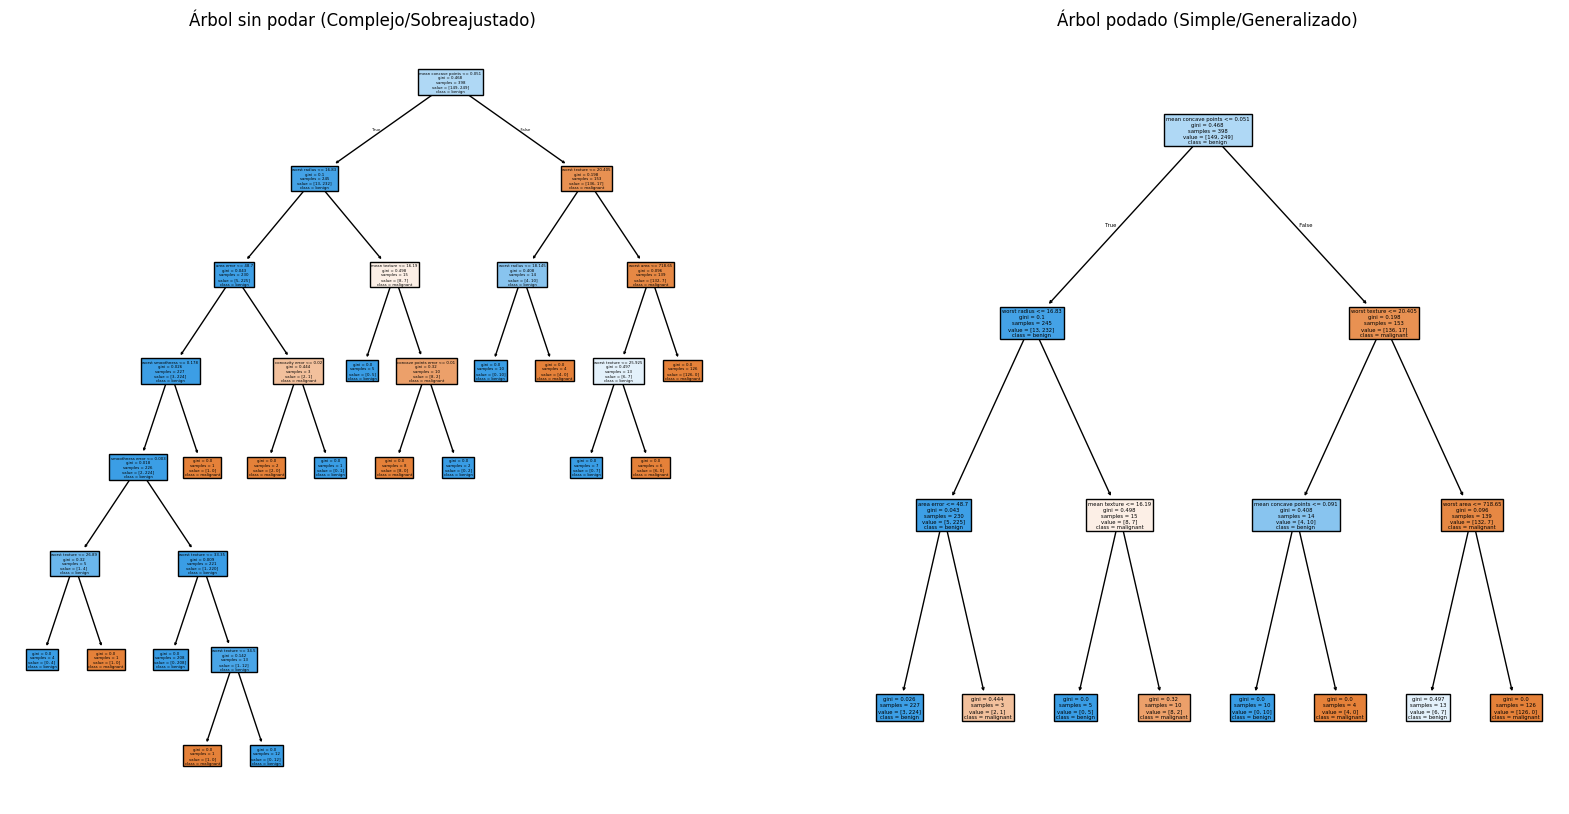

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Cargar datos
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Dividir en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ---------------------------------------------------------
# CASO A: Árbol sin podar (crece libremente)
# ---------------------------------------------------------
clf_unpruned = DecisionTreeClassifier(random_state=42)
clf_unpruned.fit(X_train, y_train)

# ---------------------------------------------------------
# CASO B: Árbol podado (Pre-poda limitando la profundidad)
# ---------------------------------------------------------
clf_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_pruned.fit(X_train, y_train)

# 3. Evaluación
y_pred_unpruned_train = clf_unpruned.predict(X_train)
y_pred_unpruned_test = clf_unpruned.predict(X_test)

y_pred_pruned_train = clf_pruned.predict(X_train)
y_pred_pruned_test = clf_pruned.predict(X_test)

print("--- ÁRBOL SIN PODAR ---")
print(f"Precisión Entrenamiento: {accuracy_score(y_train, y_pred_unpruned_train):.4f}")
print(f"Precisión Test: {accuracy_score(y_test, y_pred_unpruned_test):.4f}")

print("\n--- ÁRBOL PODADO (max_depth=3) ---")
print(f"Precisión Entrenamiento: {accuracy_score(y_train, y_pred_pruned_train):.4f}")
print(f"Precisión Test: {accuracy_score(y_test, y_pred_pruned_test):.4f}")

# 4. Visualización
plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plot_tree(clf_unpruned, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.title("Árbol sin podar (Complejo/Sobreajustado)")

plt.subplot(1, 2, 2)
plot_tree(clf_pruned, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.title("Árbol podado (Simple/Generalizado)")

plt.show()